<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/Money_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import glob as gb
import os
import matplotlib.pyplot as plt
from random import randint
from keras.callbacks import EarlyStopping
from random import randint

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/dataset_money/train',target_size=(500,500))
validation_set=train.flow_from_directory('/content/drive/MyDrive/dataset_money/validation',target_size=(500,500))

Found 208 images belonging to 10 classes.
Found 208 images belonging to 10 classes.


In [ ]:
training_set.class_indices


{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500d': 6,
 '500k': 7,
 '50k': 8,
 '5k': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(500,500,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 20, batch_size=120, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=80)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 130s 17s/step - loss: 1374.2579 - accuracy: 0.1779 - val_loss: 922.3890 - val_accuracy: 0.1442
Epoch 2/20
7/7 [==============================] - 5s 778ms/step - loss: 406.6774 - accuracy: 0.1587 - val_loss: 187.8981 - val_accuracy: 0.1731
Epoch 3/20
7/7 [==============================] - 5s 781ms/step - loss: 76.3128 - accuracy: 0.2981 - val_loss: 17.6309 - val_accuracy: 0.3654
Epoch 4/20
7/7 [==============================] - 5s 776ms/step - loss: 10.8032 - accuracy: 0.6154 - val_loss: 11.6773 - val_accuracy: 0.4760
Epoch 5/20
7/7 [==============================] - 5s 779ms/step - loss: 1.6737 - accuracy: 0.9038 - val_loss: 14.4541 - val_accuracy: 0.4856
Epoch 6/20
7/7 [==============================] - 5s 753ms/step - loss: 2.6957 - accuracy: 0.8221 - val_loss: 11.1849 - val_accuracy: 0.5529
Epoch 7/20
7/7 [==============================] - 5s 774ms/step - loss: 0.1753 - accuracy: 0.9567 - val_loss: 6.4385 - val_accuracy: 0.6010
Epoch

In [ ]:
model.save('CNN_money.h5')

In [ ]:
from keras.models import load_model
CNN_money =load_model('CNN_money.h5')

Sai số kiểm tra là:  80.85389709472656
Độ chính xác kiểm tra là:  0.3701923191547394


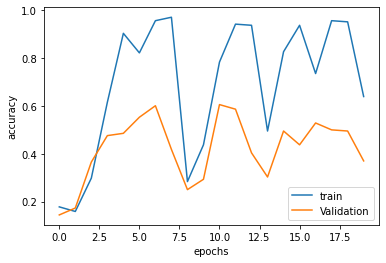

In [ ]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

2
1k


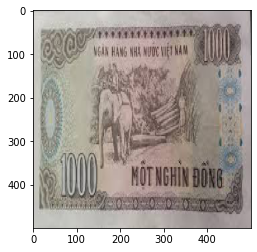

In [ ]:
img_path = '/content/drive/MyDrive/dataset_money/test/1k (43).jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
money=np.argmax(CNN_money.predict(img))
pred = model.predict(img)
classes = ['100k','10k','1k','200k','20k','2k','500d','500k','50k','5k']
print(np.argmax(pred))
if money==0: print(classes[0])
elif money==1: print(classes[1])
elif money==2: print(classes[2])
elif money==3: print(classes[3])
elif money==4: print(classes[4])
elif money==5: print(classes[5])
elif money==6: print(classes[6])
elif money==7: print(classes[7])
elif money==8: print(classes[8])
elif money==9: print(classes[9])

5
2k


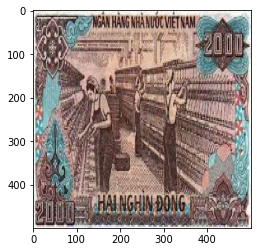

In [ ]:
img_path = '/content/drive/MyDrive/dataset_money/test/2k (35).jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
money=np.argmax(CNN_money.predict(img))
pred = model.predict(img)
classes = ['100k','10k','1k','200k','20k','2k','500d','500k','50k','5k']
print(np.argmax(pred))
if money==0: print(classes[0])
elif money==1: print(classes[1])
elif money==2: print(classes[2])
elif money==3: print(classes[3])
elif money==4: print(classes[4])
elif money==5: print(classes[5])
elif money==6: print(classes[6])
elif money==7: print(classes[7])
elif money==8: print(classes[8])
elif money==9: print(classes[9])

9
5k


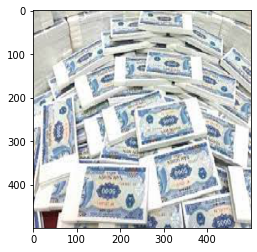

In [ ]:
img_path = '/content/drive/MyDrive/dataset_money/test/5k (63).jpg'
img=load_img(img_path,target_size=(500,500))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,500,500,3)
img=img.astype('float32')
img=img/255
money=np.argmax(CNN_money.predict(img))
pred = model.predict(img)
classes = ['100k','10k','1k','200k','20k','2k','500d','500k','50k','5k']
print(np.argmax(pred))
if money==0: print(classes[0])
elif money==1: print(classes[1])
elif money==2: print(classes[2])
elif money==3: print(classes[3])
elif money==4: print(classes[4])
elif money==5: print(classes[5])
elif money==6: print(classes[6])
elif money==7: print(classes[7])
elif money==8: print(classes[8])
elif money==9: print(classes[9])